In [17]:
## get data
import os
import wrangle

## analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

**Formula**  

- for each states:
    - **Note:** proportion of ppl get sick who are in labor force (current unemployment rate, by age)

$$unquarantine\_ change\_ rate=\sum_{i=0}^{n} \sum_{j=0}^{m}{proportion\_of\_state\_sick_{i,j}}\times{proportion\_of\_inds\_in\_state_{i,j}}$$
$$n: number \space of \space states$$
$$m: number \space of \space industries$$


- Depending on how much data we have, we could put _shock_ in the formula (financial crsis, hospital bed overflow) 
    
- quarantine_change_rate (come back to this)
    - we should not assume quarantine rate for all the states, might need diff quarantine states
    - Jenn: current quarantine measures for each states
    - WFH possibility will diff from industry
    - layoffs

- Health care cost 

## Data
- employment 2019
- covid 19 confirmed cases
- states populations :https://www.census.gov/quickfacts/NY


### employment

In [18]:
employment_ny = wrangle.get_ny_employment()

In [19]:
employment_ny.head()

,naics_code,industry,2019,2021,net_change,pct_change
1,601,"Total Self Employed, All Jobs",570590,577460,6870,0.0120402
2,11,"Agriculture, Forestry, Fishing and Hunting",31180,31870,690,0.0221296
8,21,Mining,4230,4550,320,0.0756501
12,22,Utilities,36700,36430,-270,-0.00735695
13,23,Construction,380940,390570,9630,0.0252796


In [20]:
employment_nj = wrangle.get_nj_employment()

In [21]:
employment_nj.head()

,industry,2016,2026,net_change,pct_change
0,Total Nonfarm,4073600,4402180,328580,0.778744
1,Total Private Sector,3792200,4134190,341990,0.867189
2,Goods Producing,397000,429740,32740,0.795589
3,Natural Resources and Mining,1300,1400,100,0.743833
4,Construction,153600,176260,22660,1.3856


In [43]:
employment_ny.industry

1                   Total Self Employed, All Jobs
2      Agriculture, Forestry, Fishing and Hunting
8                                          Mining
12                                      Utilities
13                                   Construction
17                                  Manufacturing
39                                Wholesale Trade
43                                   Retail Trade
56                 Transportation and Warehousing
67                                    Information
74                           Financial Activities
81             Professional and Business Services
86                           Educational Services
87              Health Care and Social Assistance
92            Arts, Entertainment, and Recreation
96                Accommodation and Food Services
99             Other Services (except Government)
104                                    Government
Name: industry, dtype: object

### covid 19

In [28]:
covid19_us = wrangle.get_covid_data(date = "03-30-2020")

In [29]:
ny_confirmed = covid19_us.loc[covid19_us["Province_State"] == "New York", "Confirmed"].sum()

### population

In [30]:
population_2019 = wrangle.get_population_data()

In [31]:
population_2019.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS
0,10,0,0,0,United States,328239523,255200373,77.7
1,40,3,6,1,Alabama,4903185,3814879,77.8
2,40,4,9,2,Alaska,731545,551562,75.4
3,40,4,8,4,Arizona,7278717,5638481,77.5
4,40,3,7,5,Arkansas,3017804,2317649,76.8


In [32]:
ny_pop = population_2019.loc[population_2019["NAME"] == "New York","POPESTIMATE2019"].values[0]

In [33]:
ny_confirmed/ny_pop

0.0034267762082222375

### GDP

In [34]:
gdp_dir = os.path.join(os.getcwd(),"data/qgdpstate0120_2.pdf")

In [35]:
gdp_states = wrangle.get_gdp_by_states(data_dir=gdp_dir)

In [36]:
gdp_states_inds = wrangle.get_gdp_pct_by_states_by_inds(data_dir=gdp_dir)

In [37]:
gdp_states.head()

,areas,2018-1,2018-2,2018-3,2018-4,2019-1,2019-2,2019-3
0,United States,"20,163,159","20,510,177","20,749,752","20,897,804","21,098,827","21,340,267","21,542,540"
1,New England,"1,070,863","1,084,947","1,096,174","1,101,531","1,118,703","1,130,084","1,142,586"
2,Connecticut,"272,854","273,884","278,295","277,874","281,659","284,357","287,560"
3,Maine,"63,698","64,746","65,434","65,545","66,590","67,138","67,905"
4,Massachusetts,"558,472","568,220","573,506","577,754","586,347","592,588","599,092"


In [38]:
gdp_states_inds.head()

,areas,states_overall,agriculture_forestry_fishing_insuranceand_hunting,mining_quarrying_and_oil_and_gas_extraction,utilities,construction,retail_trade,transportation_and_warehousing,durable_goods_manufacturing,nondurable_goods_manufacturing,...,management_of_companies_and_enterprises,administrative_and_support_and_waste_management_and_remediation_services,arts_entertainment_and_recreation,accomodation_and_food_services,real_estate_and_rental_and_leasing,professional_scientific_and_technical_services,educational_services,health_care_and_social_assistance,other_services_except_government_and_government_enterprises_,government_and_government_enterprises
0,United States,2.1,0.06,0.11,-0.26,-0.09,0.43,-0.03,0.01,0.46,...,0.16,0.10,0.02,0.17,0.11,0.42,0.08,0.19,0.05,0.01
1,New England,2.1,0.01,0.01,-0.24,-0.09,0.39,-0.02,0.02,0.33,...,0.20,0.12,0.04,0.17,0.09,0.56,0.23,0.21,0.05,-0.01
2,Connecticut,2.1,0.00,0.00,-0.27,-0.15,0.39,-0.01,0.02,0.71,...,0.19,0.11,0.04,0.11,0.03,0.37,0.27,0.17,0.07,-0.04
3,Maine,2.1,0.01,0.00,-0.22,0.04,0.72,0.01,-0.02,0.29,...,0.27,0.15,0.05,0.33,0.07,0.26,0.06,0.15,0.05,-0.10
4,Massachusetts,2.2,0.02,0.01,-0.21,-0.11,0.31,-0.03,0.04,0.21,...,0.20,0.10,0.03,0.16,0.13,0.72,0.24,0.22,0.05,0.00


## unquarantine_change_rate: 

In [42]:
(employment_ny['2019']/sum(employment_ny['2019']))*(ny_confirmed/ny_pop)

1      0.000191
2      0.000010
8      0.000001
12     0.000012
13     0.000128
17     0.000148
39     0.000108
43     0.000311
56     0.000094
67     0.000091
74     0.000238
81     0.000441
86     0.000399
87     0.000560
92     0.000056
96     0.000252
99     0.000146
104    0.000241
Name: 2019, dtype: float64

In [10]:
def get_unquarantine_change_rate():
    
    return 
    

- output

(total dollar producted per hours of work) * (total hours put in)
- pandemic in various way 
    - affect # of hours or value come out of the hours 
        - in quarn affected inds, dollar value per hours go down (nobody buys the product), entertament, macy's
        
        - num of hours: ppl get sick not able to work (especially die), reduce # of hours, tradeoff: forcing business to close, reducing dollar value. E.g. Blackstone, 
    - 

**Next:**
- use the code SEIR, along with initial condition nytimes, provide state level number of discese ineffected, by state, by industry, and then hours reduction and dollar value

- then link to state level eco data

## SEIR Model 
- by Christian Hubbs: https://towardsdatascience.com/social-distancing-to-slow-the-coronavirus-768292f04296

- S - Susceptible, E - Exposed, I - Infected, R - Recovered
- inputs: init_vals: S_0 = 1-1/n, E_0 = 1/N, I_0, R_0

- No death rate incoporated

In [56]:
def base_seir_model(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

- ρ, to capture our social distancing effect. This is going to be a constant term between 0–1, where 0 indicates everyone is locked down and quarantined while 1 is equivalent to our base case above.

In [62]:
def seir_model_with_soc_dist(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma, rho = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

- So if we assume we have 10k people in our population, and we begin with one exposed person and the remaining 9,999 susceptible, we have:

In [92]:
# Define parameters
t_max = 365
dt = 1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = ny_pop
n = ny_confirmed
init_vals = 1 - n/N, n/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
params = alpha, beta, gamma
# Run simulation
results = base_seir_model(init_vals, params, t)
rho = 0.5
params = alpha, beta, gamma, rho
results2= seir_model_with_soc_dist(init_vals, params, t)

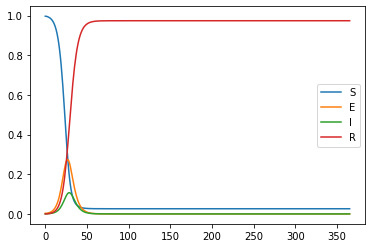

In [111]:

plt.plot(pd.DataFrame(results)[0], label = "S")
plt.plot(pd.DataFrame(results)[1], label = "E")
plt.plot(pd.DataFrame(results)[2], label = "I")
plt.plot(pd.DataFrame(results)[3], label = "R")

plt.legend()

In [101]:
def get_infections_number(t_max, dt, N, n,alpha,beta,gamma,rho):
    t = np.linspace(0, t_max, int(t_max/dt) + 1)
    init_vals = 1 - n/N, n/N, 0, 0
    params = alpha, beta, gamma, rho
    results = seir_model_with_soc_dist(init_vals, params, t)
    return pd.DataFrame(results)[2]*N

In [102]:
r = get_infections_number(t_max=t_max,dt=dt,N=N, n=n, alpha=alpha, beta=beta, gamma=gamma,rho=rho)

In [112]:
r_no_dist = get_infections_number(t_max=t_max,dt=dt,N=N, n=n, alpha=alpha, beta=beta, gamma=gamma,rho=1)

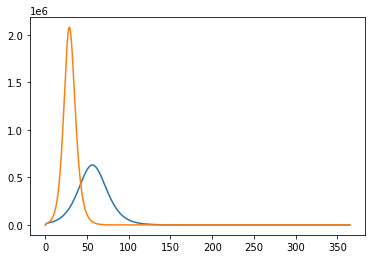

In [113]:
plt.plot(r)
plt.plot(r_no_dist)

## Infections 
- What would the recover period for a infected people - 2 weeks 
- We need to be careful on identifying how many of infected people are in labor force - 60%


#### Infected number after 14 days (no quarantine)

In [133]:
days = 14
labor_pct = 0.6

In [134]:
ttl_infected = sum(r[:days])
post_comfirmed_cases = ny_confirmed + ttl_infected

In [135]:
infection_rate = post_comfirmed_cases/ny_pop

In [136]:
infection_rate

0.02302926404307495

In [137]:
labor_infection_rate = infection_rate*labor_pct

**Notes:**
-  we assumed 60% of infected case are in labor force
-  How about recovery? ppl who got sick 14 days ago should be recoverd from it.

- `labor_infection_rate` : how many of infected cases are in labor force.
    - We want to use this rate to identify how this would affect the manhours. This is a overall estimation. To be more granular, we could use adjust `labor_infection_rate` based on each industry 

In [146]:
employment_ny.shape[0]

18

In [145]:
employment_ny.industry

1                   Total Self Employed, All Jobs
2      Agriculture, Forestry, Fishing and Hunting
8                                          Mining
12                                      Utilities
13                                   Construction
17                                  Manufacturing
39                                Wholesale Trade
43                                   Retail Trade
56                 Transportation and Warehousing
67                                    Information
74                           Financial Activities
81             Professional and Business Services
86                           Educational Services
87              Health Care and Social Assistance
92            Arts, Entertainment, and Recreation
96                Accommodation and Food Services
99             Other Services (except Government)
104                                    Government
Name: industry, dtype: object

#### get `labor_infection_rate` for each industry
**Notes:**

1.  output = dollar_value_per_hour * num_hours 
    - Labor productivity :
        - data is not avaliable on states-industry level : only _Private Nonfarm_ https://www.bls.gov/lpc/lpc-by-state-and-region.xlsx
        - num_hours calculation: 
            - Hours worked
            - BLS creates estimates of state-level hours worked for all people as shown in equation (1):
            - Hours worked = [N * AWH * HWHP * 52] + SEUFWhours,                                                              (1)

    where N is wage and salary employment, AWH is all-employee average weekly hours paid, HWHP is the hours-worked-to-hours-paid ratio, and SEUFWhours is unincorporated self-employed worker (also referred to as proprietors) and unpaid family worker hours. For wage and salary workers, employment is based primarily on the CES state-level employment series, with supplemental employment counts for the nonfarm portion of the agricultural sector coming from the Quarterly Census of Employment and Wages (QCEW).18 In some instances in which QCEW data are suppressed, employment is imputed using a variety of methods, such as linear interpolation, ratios of the missing industry to the total in different years, or ratios based on establishment counts. In total over the period, approximately 25 percent of the state-year observations contain imputed data. However, the imputed estimates average only 0.005 percent of total wage and salary employment.
    
    
    
2. Simple approach:
    - Looking for labor reduction on state-industry level.
    - then apply that labor reduction to GDP reduction

In [148]:
labor_infection_rate_v = np.dot(labor_infection_rate,np.repeat(1,employment_ny.shape[0]))

In [155]:
employment_ny['2019']*labor_infection_rate_v

1       7884.160662
2        430.831472
8         58.448272
12       507.104394
13      5263.660707
17      6094.372319
39      4450.635569
43     12855.027306
56      3863.389336
67      3773.713382
74      9803.419528
81     18202.007890
86     16447.454321
87     23121.749567
92      2300.208951
96     10387.487722
99      6045.319987
104     9929.988363
Name: 2019, dtype: float64